Pierwsze 5 wierszy danych:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
Epoch 1/50
12/12 [==============================] - 2s 35ms/step - loss: 0.8963 - accuracy: 0.5521 - val_loss: 0.8716 - val_accuracy: 0.8333
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.7204 - accuracy: 0.8229 - val_loss: 0.7492 - val_accuracy: 0.8750
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6092 - accuracy: 0.8542 - val_loss: 0.6530 - val_accuracy: 0.9167
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5323 - accuracy: 0.8438 - val_loss: 0.5588 - val_accuracy: 0.9167
Epoch 5/50
12/12 [==========

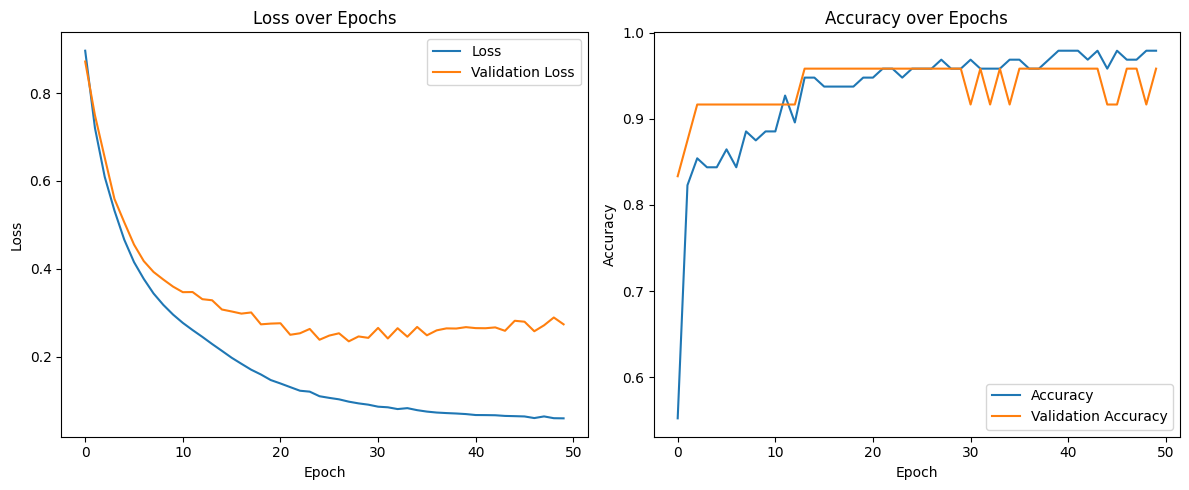

1/1 [==============================] - 0s 132ms/step


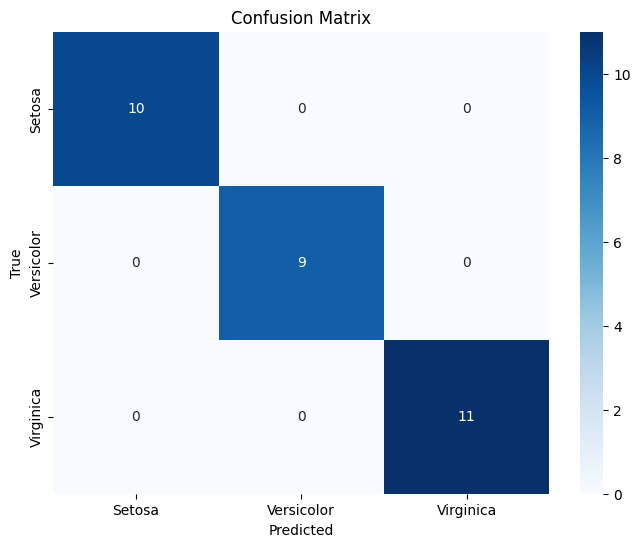

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1/1 [==============================] - 0s 33ms/step
Przewidywane klasy: [1 0 2 1 1]
Prawdziwe klasy: [1 0 2 1 1]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Wczytanie danych
file_path = 'iris.csv'
data = pd.read_csv(file_path)

# Eksploracja danych
print("Pierwsze 5 wierszy danych:")
print(data.head())

# Podział na cechy i etykiety
X = data.iloc[:, :-1].values  # Wszystkie kolumny poza ostatnią
y = data.iloc[:, -1].values   # Ostatnia kolumna

# Kodowanie etykiet
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Standaryzacja cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Budowa modelu
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=8, verbose=1)

# Ewaluacja modelu
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Wizualizacja wyników
# Wykresy strat i dokładności
plt.figure(figsize=(12, 5))

# Wykres straty
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Tabele i statystyki
# Macierz konfuzji
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Raport klasyfikacji
class_report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

# Predykcja dla przykładowych danych
sample_data = X_test[:5]
sample_predictions = model.predict(sample_data)

print("Przewidywane klasy:", np.argmax(sample_predictions, axis=1))
print("Prawdziwe klasy:", np.argmax(y_test[:5], axis=1))
